In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats
from sklearn.model_selection import train_test_split

In [52]:
df=pd.read_csv('~\Capestone\Capestone_DataSet\cfs-2012-pumf-csv\cfs_2012_pumf_csv.txt')

In [53]:
df.head()

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
0,1,25,148,25-148,25,148,25-148,333,2,35,14,2178,11,14,17,N,N,N,N,208.5
1,2,42,428,42-428,6,41740,06-41740,311,3,35,14,344,11,2344,2734,N,N,N,N,193.3
2,3,26,220,26-220,47,314,47-314,322,2,27,4,4197,5134,470,579,N,N,N,N,51.2
3,4,20,556,20-556,20,556,20-556,323,1,29,4,116,6,3,3,N,N,N,N,238.7
4,5,12,99999,12-99999,12,99999,12-99999,4235,3,33,5,388,527,124,201,N,N,N,N,398.1


In [54]:
# SHIPMT_ID as index
df.set_index('SHIPMT_ID',inplace=True)

In [55]:
# converting integers to string/object
df[['ORIG_STATE', 'ORIG_MA', 'ORIG_CFS_AREA', 'DEST_STATE','DEST_MA', 'DEST_CFS_AREA', 'NAICS', 
   'QUARTER', 'SCTG', 'MODE','TEMP_CNTL_YN', 'EXPORT_YN', 'EXPORT_CNTRY', 'HAZMAT']]=df[['ORIG_STATE', 'ORIG_MA', 'ORIG_CFS_AREA', 'DEST_STATE','DEST_MA', 'DEST_CFS_AREA', 'NAICS', 
   'QUARTER', 'SCTG', 'MODE','TEMP_CNTL_YN', 'EXPORT_YN', 'EXPORT_CNTRY', 'HAZMAT']].astype(str)

In [56]:
# dropping columns ORIG_CFS_AREA & DEST_CFS_AREA

df.drop(['ORIG_CFS_AREA','DEST_CFS_AREA'],axis=1,inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4547661 entries, 1 to 4547661
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ORIG_STATE          object 
 1   ORIG_MA             object 
 2   DEST_STATE          object 
 3   DEST_MA             object 
 4   NAICS               object 
 5   QUARTER             object 
 6   SCTG                object 
 7   MODE                object 
 8   SHIPMT_VALUE        int64  
 9   SHIPMT_WGHT         int64  
 10  SHIPMT_DIST_GC      int64  
 11  SHIPMT_DIST_ROUTED  int64  
 12  TEMP_CNTL_YN        object 
 13  EXPORT_YN           object 
 14  EXPORT_CNTRY        object 
 15  HAZMAT              object 
 16  WGT_FACTOR          float64
dtypes: float64(1), int64(4), object(12)
memory usage: 624.5+ MB


In [58]:
df.columns

Index(['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'NAICS', 'QUARTER',
       'SCTG', 'MODE', 'SHIPMT_VALUE', 'SHIPMT_WGHT', 'SHIPMT_DIST_GC',
       'SHIPMT_DIST_ROUTED', 'TEMP_CNTL_YN', 'EXPORT_YN', 'EXPORT_CNTRY',
       'HAZMAT', 'WGT_FACTOR'],
      dtype='object')

In [59]:
# number of unique values
df[['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'NAICS', 'QUARTER', 'SCTG', 'MODE', 'TEMP_CNTL_YN',
       'EXPORT_YN', 'EXPORT_CNTRY', 'HAZMAT']].nunique()

ORIG_STATE      52
ORIG_MA         72
DEST_STATE      51
DEST_MA         71
NAICS           45
QUARTER          4
SCTG            52
MODE            21
TEMP_CNTL_YN     2
EXPORT_YN        2
EXPORT_CNTRY     4
HAZMAT           3
dtype: int64

In [60]:
# unique values in a column
df['ORIG_STATE'].unique()

array(['25', '42', '26', '20', '12', '24', '19', '6', '13', '55', '39',
       '33', '31', '54', '32', '9', '17', '37', '48', '18', '29', '49',
       '36', '27', '53', '47', '34', '5', '38', '56', '1', '51', '23',
       '45', '8', '35', '4', '21', '28', '41', '44', '2', '16', '40',
       '46', '22', '15', '30', '10', '50', '11', '0'], dtype=object)

In [61]:
df['ORIG_STATE'].value_counts

<bound method IndexOpsMixin.value_counts of SHIPMT_ID
1          25
2          42
3          26
4          20
5          12
           ..
4547657     9
4547658    39
4547659    36
4547660    48
4547661    30
Name: ORIG_STATE, Length: 4547661, dtype: object>

In [62]:
#Defining 0 and 99 as Missing for ORIG_STATE, ORIG_MA, SCTG, MODE Donot include in report, 
def definingNA(x):
    if (x in ('0','00','99')):
        x = ""
    else:
        return x

In [63]:
#Defining supressed values '0','00','99' as Missing, Donot include in report, 
df['ORIG_STATE']=df['ORIG_STATE'].apply(definingNA)
df['ORIG_MA']=df['ORIG_MA'].apply(definingNA)
df['SCTG']=df['SCTG'].apply(definingNA)
df['MODE']=df['MODE'].apply(definingNA)

In [64]:
# Number of missing values in categorical data
df[['ORIG_STATE','MODE','SCTG','MODE']].isna().sum()

ORIG_STATE     38
MODE          691
SCTG          705
MODE          691
dtype: int64

In [65]:
df.dropna(inplace=True)

In [66]:
df[['ORIG_STATE','MODE','SCTG','MODE']].isna().sum()

ORIG_STATE    0
MODE          0
SCTG          0
MODE          0
dtype: int64

In [67]:
# SCTG column, 01-05, 06-09, 10-14, 15-19, 20-24, 25-30, 31-34, 39-99
df.groupby('SCTG').count()

,ORIG_STATE,ORIG_MA,DEST_STATE,DEST_MA,NAICS,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
SCTG,,,,,,,,,,,,,,,,
01,2239,2239,2239,2239,2239,2239,2239,2239,2239,2239,2239,2239,2239,2239,2239,2239
01-05,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136
02,24965,24965,24965,24965,24965,24965,24965,24965,24965,24965,24965,24965,24965,24965,24965,24965
03,54265,54265,54265,54265,54265,54265,54265,54265,54265,54265,54265,54265,54265,54265,54265,54265
04,45617,45617,45617,45617,45617,45617,45617,45617,45617,45617,45617,45617,45617,45617,45617,45617
05,62355,62355,62355,62355,62355,62355,62355,62355,62355,62355,62355,62355,62355,62355,62355,62355
06,53265,53265,53265,53265,53265,53265,53265,53265,53265,53265,53265,53265,53265,53265,53265,53265
06-09,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134
07,183021,183021,183021,183021,183021,183021,183021,183021,183021,183021,183021,183021,183021,183021,183021,183021


In [68]:
df.sort_values('SCTG')['SCTG'].unique()

array(['01', '01-05', '02', '03', '04', '05', '06', '06-09', '07', '08',
       '09', '10', '10-14', '11', '12', '13', '14', '15', '15-19', '17',
       '18', '19', '20', '20-24', '21', '22', '23', '24', '25', '25-30',
       '26', '27', '28', '29', '30', '31', '31-34', '32', '33', '34',
       '35', '35-38', '36', '37', '38', '39', '39-99', '40', '41', '43'],
      dtype=object)

In [69]:
# converting SCTG codes to INDUSTRIES, refering STATS CAN website
# https://www150.statcan.gc.ca/n1/pub/50-503-x/50-503-x2018001-eng.htm

def SCTG_IND(SCTG):
    if SCTG in ('01', '01-05', '02', '03', '04', '05'):
        return 'AGRI'
    elif SCTG in ('06', '06-09', '07','08', '09'):
        return 'FOOD'
    elif SCTG in ('10', '10-14', '11', '12', '13', '14'): 
        return 'MNRLS'
    elif SCTG in ('15', '15-19','17', '18', '19'):
        return 'FUEL'
    elif SCTG in ('20', '20-24', '21', '22', '23', '24'):
        return 'PLCHM'
    elif SCTG in ('25','25-30', '26', '27', '28', '29', '30'):
        return 'FRPAP'
    elif SCTG in ('31', '31-34', '32', '33', '34'):
        return 'BMETL'
    elif SCTG in ('35', '35-38', '36', '37', '38'):
        return 'TRANS'
    elif SCTG =='41':
        return 'WASTE'
    elif SCTG in ('39','40','43','39-99'):
        return 'MISC'

In [70]:
# converting SCTG codes to INDUSTRIES, refering STATS CAN website
df['SCTG']=df['SCTG'].apply(SCTG_IND)

In [71]:
df['SCTG'].unique()

array(['TRANS', 'FRPAP', 'BMETL', 'MISC', 'PLCHM', 'AGRI', 'FUEL',
       'MNRLS', 'FOOD', 'WASTE'], dtype=object)

In [72]:
df.head()

,ORIG_STATE,ORIG_MA,DEST_STATE,DEST_MA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
SHIPMT_ID,,,,,,,,,,,,,,,,,
1,25,148,25,148,333,2,TRANS,14,2178,11,14,17,N,N,N,N,208.5
2,42,428,6,41740,311,3,TRANS,14,344,11,2344,2734,N,N,N,N,193.3
3,26,220,47,314,322,2,FRPAP,4,4197,5134,470,579,N,N,N,N,51.2
4,20,556,20,556,323,1,FRPAP,4,116,6,3,3,N,N,N,N,238.7
5,12,99999,12,99999,4235,3,BMETL,5,388,527,124,201,N,N,N,N,398.1


In [73]:
df['EXPORT_YN'].value_counts()

N    4352706
Y     182961
Name: EXPORT_YN, dtype: int64

In [74]:
df['EXPORT_CNTRY'].value_counts()

N    4352706
O     109588
C      54176
M      19197
Name: EXPORT_CNTRY, dtype: int64

In [75]:
df[df['EXPORT_YN']=='Y']

,ORIG_STATE,ORIG_MA,DEST_STATE,DEST_MA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
SHIPMT_ID,,,,,,,,,,,,,,,,,
6,24,47900,30,99999,337,2,MISC,4,3716,1132,1942,2265,N,Y,C,N,21.9
78,39,184,34,408,332,4,MISC,11,796,4,391,1619,N,Y,O,N,3099.9
163,34,408,36,160,326,1,TRANS,4,835,29,290,401,N,Y,C,N,314.6
231,25,148,25,148,336,1,TRANS,11,26455,80,28,42,N,Y,O,N,25.6
284,45,273,36,408,334,1,TRANS,11,28325,1216,615,1061,N,Y,O,N,24.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4547505,39,99999,36,160,327,3,BMETL,4,8281,46282,225,285,N,Y,C,N,432.3
4547533,6,99999,6,488,312,3,FOOD,4,36853,48640,72,83,N,Y,O,N,1312.1
4547534,8,216,6,348,331,3,BMETL,4,69350,34200,858,1056,N,Y,O,N,23.8


In [76]:
df.describe()

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,WGT_FACTOR
count,4.535667e+06,4.535667e+06,4.535667e+06,4.535667e+06,4.535667e+06
mean,1.745234e+04,3.534006e+04,3.850771e+02,4.735163e+02,2.313881e+03
std,1.046348e+06,8.975929e+05,5.731196e+02,6.848718e+02,1.934680e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e-01
25%,1.750000e+02,1.500000e+01,1.700000e+01,2.100000e+01,9.320000e+01
50%,8.720000e+02,2.690000e+02,1.090000e+02,1.390000e+02,2.898000e+02
75%,5.988000e+03,7.982000e+03,5.370000e+02,6.830000e+02,9.947000e+02
max,5.212778e+08,2.770296e+08,5.210000e+03,6.677000e+03,9.750000e+05


In [77]:
df['SHIPMT_VALUE']

SHIPMT_ID
1           2178
2            344
3           4197
4            116
5            388
           ...  
4547657     7988
4547658    50808
4547659      685
4547660      915
4547661    22482
Name: SHIPMT_VALUE, Length: 4535667, dtype: int64

In [78]:
# plot1=sns.distplot(df['SHIPMT_VALUE'],bins=100000)
# plot1.set(ylim=(0,100))

In [80]:
# skewiness for Quantitative data
skew(df[['SHIPMT_VALUE','SHIPMT_WGHT','SHIPMT_DIST_GC','SHIPMT_DIST_ROUTED','WGT_FACTOR']].dropna())

array([444.34647647,  79.08791579,   2.12553047,   1.96827326,
        37.0816171 ])

In [81]:
# kurtosis for Quantitative data
kurtosis(df[['SHIPMT_VALUE','SHIPMT_WGHT','SHIPMT_DIST_GC','SHIPMT_DIST_ROUTED','WGT_FACTOR']].dropna())

array([2.18081861e+05, 1.23135255e+04, 4.92672611e+00, 3.79070874e+00,
       1.73268948e+03])

In [82]:
# Shapiro Wilk Normality  test
p_value=stats.shapiro(df['SHIPMT_WGHT'].dropna())[1]
if (p_value<=0.05):
    print('Null Hypothesis of normality is rejected')
else:
        print('Null Hypothesis of normality is accepted')

Null Hypothesis of normality is rejected


C:\Users\prans\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [83]:
# correlation matrix
df.corr()

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,WGT_FACTOR
SHIPMT_VALUE,1.000000,0.083000,0.001171,0.001936,-0.001847
SHIPMT_WGHT,0.083000,1.000000,-0.001247,0.002533,-0.004433
SHIPMT_DIST_GC,0.001171,-0.001247,1.000000,0.989218,0.025704
SHIPMT_DIST_ROUTED,0.001936,0.002533,0.989218,1.000000,0.024570
WGT_FACTOR,-0.001847,-0.004433,0.025704,0.024570,1.000000


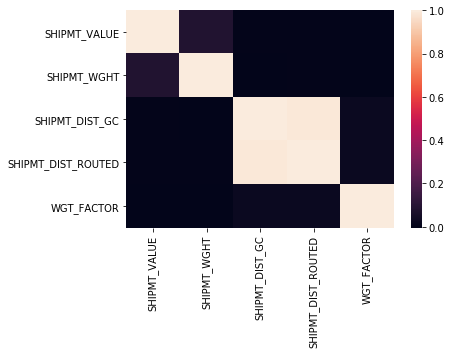

In [84]:
# # correlation matrix heat map
sns.heatmap(df.corr())

In [85]:
# train test split
df_input_train, df_input_test, df_target_train, df_target_test = train_test_split(df[['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'NAICS', 'QUARTER',
       'SCTG', 'MODE','SHIPMT_WGHT', 'SHIPMT_DIST_GC',
       'SHIPMT_DIST_ROUTED', 'TEMP_CNTL_YN', 'EXPORT_YN', 'EXPORT_CNTRY',
       'HAZMAT', 'WGT_FACTOR']], df[['SHIPMT_VALUE']], test_size=0.2, random_state=101)